---
authors:
  - name: Melanie Lauer
---
# Atmospheric River shapes

This example script was provided as part of the Data Management Project (INF) within the TR-172 "ArctiC Amplification: Climate Relevant Atmospheric and SurfaCe Processes, and Feedback Mechanisms" (AC)³ funded by the German Research Foundation (Deutsche Forschungsgemeinschaft, DFG)

Author: Melanie Lauer, Institute of Geophysics and Meteorology, University of Cologne, Germany, melanie.lauer@uni-koeln.de

Github repository: https://github.com/ac3-tr/ac3-notebooks

<font size="5">Shape of Atmospheric Rivers</font>

<font size="5">Dataset resources</font>

**Title:** Shape of atmospheric rivers for ERA5 reanalysis

**Author:** Melanie Lauer

**Year:** 2023

**Institute:** Institute of Geophysics and Meteorology - University of Cologne

**DOI**: https://doi.org/10.1594/PANGAEA.957161

**License:** Creative Commons Attribution 4.0 International

<font size="5">Contents of this notebook</font>

Illustration of the Atmospheric Rivers shape.

**Modules**

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import netCDF4
import matplotlib.path as mpath
import pangaeapy as pgp
import nest_asyncio
nest_asyncio.apply()


In [5]:
ds = pgp.PanDataSet(957161, enable_cache=True)
filenames = ds.download(columns=['Binary'], indices=[38])

[INFO] Cache directory set to: E:\tmp\pangaeapy_cache
[INFO] To change the cache directory permanently, edit: C:\Users\Johannes\.config\pangaeapy\config.toml
globalAR_ERA5_201701_201712_hourly_v2.0.nc is being retrieved from tape. Retrying in 30 seconds...
Downloaded globalAR_ERA5_201701_201712_hourly_v2.0.nc successfully!


In [7]:
data_AR = netCDF4.Dataset(filenames[0])

shape_AR = data_AR.variables['shape'][3565,0,:,:] #3656 == 29 May 2017  12 UTC

#reshape lon
shape = np.empty(shape_AR.shape)
shape[:,0:720] = shape_AR[:,720:1440]
shape[:,720:1440] = shape_AR[:,0:720]

shape = np.where(shape < 0, np.nan, shape) 
print(np.nanmin(shape))

lat = data_AR.variables['lat'][:]
lon = np.arange(-180,180,0.25)


print(np.nanmin(shape))
print(np.nanmax(shape))

1.0
1.0
19.0


<font size="5">Plotting example</font>

Text(0.5, 1.0, 'shape')

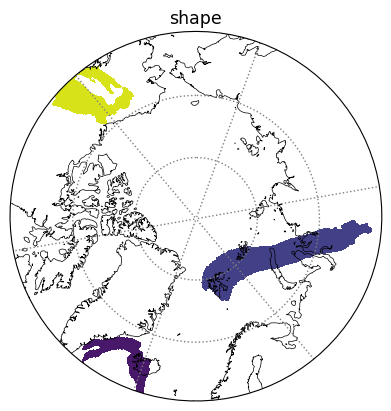

In [8]:
fig = plt.figure()#figsize=(5, 3))

ax = plt.subplot(1,1,1, projection=ccrs.NorthPolarStereo())

#plot ax1
ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
ax.coastlines(linewidth=0.5,color='k')
ax.gridlines(color='C7',lw=1,ls=':',xlocs=[],ylocs=[60,70,80])
ax.gridlines(color='C7',lw=1,ls=':',draw_labels=False,rotate_labels=False,xlocs=range(-140,161,60),ylocs=[])

#North Polar as circle
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)


ax.contourf(lon, lat, shape, transform=ccrs.PlateCarree())#NorthPolarStereo())
ax.set_title('shape',fontsize=12.5)
